# Cloning dataset

In [1]:
# This is our GitHub repository, all datasets are included in this repo
!git clone https://github.com/Alvin-Tan-Yi-Tung/Animal_Disease_Prediction.git

fatal: destination path 'Animal_Disease_Prediction' already exists and is not an empty directory.


# Data Preparation

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Animal_Disease_Prediction/backend/wahis_outbreak_details.csv")
df

,country,location,lat_long,start_date,end_date,cases,deaths
0,Armenia,Sardarapat,"40.1239 , 44.0044",2025/08/04,2025/08/05,1,1
1,Armenia,Aygeshat,"40.227 , 44.2855",2025/07/29,2025/07/30,1,1
2,Namibia,Walvisbay Lagoon,"-22.96348 , 14.48727",2025/06/16,-,-,1
3,Thailand,Si Sa Ket,"14.951072 , 104.331852",2025/06/30,-,1,1
4,Thailand,Nakhon Ratchasima,"15.552079 , 102.777379",2025/06/23,-,1,1
...,...,...,...,...,...,...,...
2195,France,FONTENAY LE COMTE,"46.45964911 , -0.78859276",2007/11/23,2007/11/29,1,1
2196,Ecuador,San Juan de Bellavista,"-3.41489966 , -79.35188579",2007/03/12,2007/06/01,1,1
2197,Ecuador,Quebrada Honda,"-3.40597651 , -79.35171856",2007/02/20,2007/06/01,1,1
2198,Ecuador,San Carlos,"-0.19417301 , -76.51244951",2007/03/06,2007/08/17,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2200 non-null   object
 1   location    2200 non-null   object
 2   lat_long    2200 non-null   object
 3   start_date  2200 non-null   object
 4   end_date    2200 non-null   object
 5   cases       2200 non-null   object
 6   deaths      2200 non-null   object
dtypes: object(7)
memory usage: 120.4+ KB


# Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert dates (string dates to datetime objects & missing end dates become NaT)
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Handle ongoing outbreaks (to indicate whether the outbreak is still active or not)
df['is_ongoing'] = df['end_date'].isna()

# Calculate the duration of on-going outbreak (output is integer days)
df['duration'] = (df['end_date'].fillna(pd.Timestamp.today()) - df['start_date']).dt.days

# Extract location features (split into two float columns)
df[['latitude', 'longitude']] = df['lat_long'].str.split(',', expand=True).astype(float)

# Convert cases and deaths to numeric
df['cases'] = pd.to_numeric(df['cases'], errors='coerce')
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')

# Fill the "-" with 0
df['cases'] = df['cases'].fillna(0)
df['deaths'] = df['deaths'].fillna(0)

# Feature engineering
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['week'] = df['start_date'].dt.isocalendar().week

# Country encoding
country_encoder = LabelEncoder()
df['country_code'] = country_encoder.fit_transform(df['country'])

print(df.head().to_string())

    country           location                lat_long start_date   end_date  cases  deaths  is_ongoing  duration   latitude   longitude  year  month  week  country_code
0   Armenia         Sardarapat       40.1239 , 44.0044 2025-08-04 2025-08-05    1.0     1.0       False         1  40.123900   44.004400  2025      8    32             2
1   Armenia           Aygeshat        40.227 , 44.2855 2025-07-29 2025-07-30    1.0     1.0       False         1  40.227000   44.285500  2025      7    31             2
2   Namibia   Walvisbay Lagoon    -22.96348 , 14.48727 2025-06-16        NaT    0.0     1.0        True        85 -22.963480   14.487270  2025      6    25            34
3  Thailand          Si Sa Ket  14.951072 , 104.331852 2025-06-30        NaT    1.0     1.0        True        71  14.951072  104.331852  2025      6    27            44
4  Thailand  Nakhon Ratchasima  15.552079 , 102.777379 2025-06-23        NaT    1.0     1.0        True        78  15.552079  102.777379  2025      6 

In [5]:
# View the data types of columns (after preprocessing)
print(df.dtypes)

country                 object
location                object
lat_long                object
start_date      datetime64[ns]
end_date        datetime64[ns]
cases                  float64
deaths                 float64
is_ongoing                bool
duration                 int64
latitude               float64
longitude              float64
year                     int32
month                    int32
week                    UInt32
country_code             int64
dtype: object


In [6]:
# View missing values for each column
print(df.isna().sum())

country           0
location          0
lat_long          0
start_date        0
end_date        336
cases             0
deaths            0
is_ongoing        0
duration          0
latitude          0
longitude         0
year              0
month             0
week              0
country_code      0
dtype: int64


In [7]:
# View the encoder of country
print(f"Encoded {len(country_encoder.classes_)} countries:")
print(country_encoder.classes_[:])

Encoded 48 countries:
['Albania' 'Argentina' 'Armenia' 'Bangladesh' 'Belgium' 'Bhutan'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Cambodia' 'Canada' 'Ceuta'
 'Chile' 'Chinese Taipei' 'Congo (Rep. of the)' 'Ecuador' 'Egypt'
 'El Salvador' 'Finland' 'France' 'French Guiana' 'Germany' 'Greece'
 'Honduras' 'Hungary' 'Indonesia' 'Italy' 'Kazakhstan' 'Liberia' 'Libya'
 'Lithuania' 'Malaysia' 'Melilla' 'Moldova' 'Myanmar' 'Namibia'
 'Netherlands' 'Nigeria' 'North Macedonia' 'Norway' 'Palestine' 'Slovakia'
 'South Africa' 'Spain' 'Sweden' 'Thailand' 'Timor-Leste'
 'United States of America' 'Uruguay']


# Split train and test set into CSV files

In [8]:
# for the training, use before 2023
# for the testing, use after 2023
# for validation, do splitting in the training
import pandas as pd

# Ensure start_date is a datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Split into training and testing
train_cutoff = '2023-01-01'
df_train = df[df['start_date'] < train_cutoff].reset_index(drop=True)
df_test = df[df['start_date'] >= train_cutoff].reset_index(drop=True)

# Show results
print(f"Training set: {df_train.shape[0]} rows")
print(f"Testing set: {df_test.shape[0]} rows")

# Optional: Quick check
print(df_train['start_date'].min(), "to", df_train['start_date'].max())
print(df_test['start_date'].min(), "to", df_test['start_date'].max())



Training set: 1794 rows
Testing set: 406 rows
2007-02-20 00:00:00 to 2022-12-30 00:00:00
2023-01-09 00:00:00 to 2025-08-04 00:00:00


# Data Preprocessing

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# --- Custom Layers ---
@tf.keras.utils.register_keras_serializable()
class OutbreakSequence(layers.Layer):
    def call(self, inputs):
        return inputs[:, :, 0:1]

    def get_config(self):
        return {}

@tf.keras.utils.register_keras_serializable()
class CountrySequence(layers.Layer):
    def call(self, inputs):
        return tf.cast(inputs[:, :, 1], dtype='int32')

    def get_config(self):
        return {}

@tf.keras.utils.register_keras_serializable()
class DateSequence(layers.Layer):
    """Extracts time features from input tensor (3rd column)."""
    def call(self, inputs):
        return inputs[:, :, 2:]  # Year, Month, Week, Day

    def get_config(self):
        return {}

# --- LSTM Model Builder ---
def build_global_lstm(
    seq_len: int,
    n_countries: int,
    emb_dim: int = 8,
    lstm_units: tuple = (128, 64),
    dense_units: tuple = (64, 32),
    dropout_rates: tuple = (0.3, 0.3, 0.2),
    learning_rate: float = 1e-3,
    date_dim: int = 3  # Number of time features
) -> models.Model:
    """
    Build a global LSTM model with country embeddings & date features.
    """
    inputs = layers.Input(shape=(seq_len, 2 + date_dim))  # outbreak, country_id, date features

    # Extract sequences
    outbreak_seq = OutbreakSequence(name='outbreak_sequence')(inputs)
    country_seq = CountrySequence(name='country_sequence')(inputs)
    date_seq = DateSequence(name='date_sequence')(inputs)

    # Embedding for country IDs
    country_emb = layers.Embedding(
        input_dim=n_countries,
        output_dim=emb_dim,
        mask_zero=False
    )(country_seq)

    # Merge outbreak feature + country embedding + date features
    merged = layers.Concatenate(axis=-1)([outbreak_seq, country_emb, date_seq])

    # LSTM stack
    x = layers.LSTM(lstm_units[0], return_sequences=True)(merged)
    x = layers.Dropout(dropout_rates[0])(x)
    x = layers.LSTM(lstm_units[1])(x)
    x = layers.Dropout(dropout_rates[1])(x)

    # Dense layers
    for units in dense_units[:-1]:
        x = layers.Dense(units, activation="relu")(x)
        x = layers.Dropout(dropout_rates[2])(x)

    x = layers.Dense(dense_units[-1], activation="relu")(x)
    outputs = layers.Dense(1, activation="linear")(x)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss="mse",
        metrics=["mae", "mse"]
    )
    return model


# --- Feature Engineering to Include Dates ---
def add_time_features(panel):
    """
    Adds normalized year, month, and week features for model input.
    """
    df = panel.copy()
    df['year'] = df['start_date'].dt.year
    df['month'] = df['start_date'].dt.month
    df['week'] = df['start_date'].dt.isocalendar().week.astype(int)

    # Normalize to [0,1]
    df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
    df['month'] = df['month'] / 12.0
    df['week'] = df['week'] / 52.0

    return df


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# --- helpers ---
def _freq_from_interval(interval: str) -> str:
    interval = interval.lower()
    if interval == "weekly":
        return "W"
    if interval == "monthly":
        return "ME"
    raise ValueError("interval must be one of: 'weekly', 'monthly'")

def build_regular_panel(
    df, interval="weekly", start_date=None, end_date=None,
    country_col="country", target_col="outbreak_count",
    countries_list=None, n_lags=0, label_encoder=None):

    df = df.copy()
    df["start_date"] = pd.to_datetime(df["start_date"])
    if target_col not in df.columns:
        df[target_col] = 1

    needed = [country_col, "start_date", target_col]
    missing = [c for c in needed if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    if countries_list is not None:
        df = df[df[country_col].isin(countries_list)].copy()

    global_min = df["start_date"].min() if start_date is None else pd.to_datetime(start_date)
    global_max = df["start_date"].max() if end_date is None else pd.to_datetime(end_date)

    freq = _freq_from_interval(interval)
    full_range = pd.date_range(start=global_min, end=global_max, freq=freq)

    grouped = (
        df.groupby([country_col, pd.Grouper(key="start_date", freq=freq)])[target_col]
        .sum()
        .rename(target_col)
        .to_frame()
    )

    countries = countries_list if countries_list else sorted(df[country_col].unique())
    full_index = pd.MultiIndex.from_product([countries, full_range], names=[country_col, "start_date"])
    panel = grouped.reindex(full_index, fill_value=0).reset_index()

    if label_encoder is None:
        le = LabelEncoder()
        panel["country_id"] = le.fit_transform(panel[country_col])
    else:
        le = label_encoder
        panel["country_id"] = le.transform(panel[country_col])

    if n_lags > 0:
        panel = panel.set_index([country_col, "start_date"])
        for i in range(1, n_lags+1):
            panel[f"lag_{i}"] = panel.groupby(country_col)[target_col].shift(i).fillna(0)
        panel = panel.reset_index()

    return panel, full_range, le


# --- LSTM sequence creation ---
def create_global_lstm_sequences_from_panel(
    panel, time_steps=12, target_col="outbreak_count",
    country_id_col="country_id", start_col="start_date", scaler=None):

    panel = add_time_features(panel)  # Add time features
    if scaler is None:
        scaler = MinMaxScaler()
        panel["target_scaled"] = scaler.fit_transform(panel[[target_col]])
    else:
        panel["target_scaled"] = scaler.transform(panel[[target_col]])

    X, y, end_dates = [], [], []

    for cid, grp in panel.groupby(country_id_col, sort=True):
        grp = grp.sort_values(start_col)
        cases = grp["target_scaled"].to_numpy()
        cids = grp[country_id_col].to_numpy()
        years = grp["year"].to_numpy()
        months = grp["month"].to_numpy()
        weeks = grp["week"].to_numpy()
        dates = grp[start_col].to_numpy()

        if len(cases) <= time_steps:
            continue

        for i in range(len(cases) - time_steps):
            seq_cases = cases[i:i+time_steps]
            seq_cids = cids[i:i+time_steps]
            seq_years = years[i:i+time_steps]
            seq_months = months[i:i+time_steps]
            seq_weeks = weeks[i:i+time_steps]

            seq = np.stack([seq_cases, seq_cids, seq_years, seq_months, seq_weeks], axis=-1)
            X.append(seq)
            y.append(cases[i+time_steps])
            end_dates.append(dates[i+time_steps])

    return np.array(X, np.float32), np.array(y, np.float32), np.array(end_dates), scaler


In [11]:
# Build a unified country list
all_countries = sorted(pd.concat([df_train["country"], df_test["country"]]).unique())

# ---------------- Weekly Panels ----------------
weekly_panel_train, _, le = build_regular_panel(
    df_train, interval="weekly", countries_list=all_countries
)
weekly_panel_test, _, _ = build_regular_panel(
    df_test, interval="weekly", countries_list=all_countries, label_encoder=le
)

X_weekly_train, y_weekly_train, _, scaler_weekly = create_global_lstm_sequences_from_panel(
    weekly_panel_train, time_steps=24
)
X_weekly_test, y_weekly_test, end_dates_weekly_test, _ = create_global_lstm_sequences_from_panel(
    weekly_panel_test, time_steps=24, scaler=scaler_weekly
)

# ---------------- Monthly Panels ----------------
monthly_panel_train, _, _ = build_regular_panel(
    df_train, interval="monthly", countries_list=all_countries, label_encoder=le
)
monthly_panel_test, _, _ = build_regular_panel(
    df_test, interval="monthly", countries_list=all_countries, label_encoder=le
)

X_monthly_train, y_monthly_train, _, scaler_monthly = create_global_lstm_sequences_from_panel(
    monthly_panel_train, time_steps=12
)
X_monthly_test, y_monthly_test, end_dates_monthly_test, _ = create_global_lstm_sequences_from_panel(
    monthly_panel_test, time_steps=12, scaler=scaler_monthly
)

from sklearn.preprocessing import MinMaxScaler

y_scaler_weekly = MinMaxScaler()
y_scaler_weekly.fit(y_weekly_train.reshape(-1, 1))

y_scaler_monthly = MinMaxScaler()
y_scaler_monthly.fit(y_monthly_train.reshape(-1, 1))

# ---------------- Debug Prints ----------------
print("Weekly train panel:\n", weekly_panel_train.head())
print("Weekly X shape:", X_weekly_train.shape)
print("Weekly y shape:", y_weekly_train.shape)

print("\nMonthly train panel:\n", monthly_panel_train.head())
print("Monthly X shape:", X_monthly_train.shape)
print("Monthly y shape:", y_monthly_train.shape)


Weekly train panel:
    country start_date  outbreak_count  country_id
0  Albania 2007-02-25               0           0
1  Albania 2007-03-04               0           0
2  Albania 2007-03-11               0           0
3  Albania 2007-03-18               0           0
4  Albania 2007-03-25               0           0
Weekly X shape: (38544, 24, 5)
Weekly y shape: (38544,)

Monthly train panel:
    country start_date  outbreak_count  country_id
0  Albania 2007-02-28               0           0
1  Albania 2007-03-31               0           0
2  Albania 2007-04-30               0           0
3  Albania 2007-05-31               0           0
4  Albania 2007-06-30               0           0
Monthly X shape: (8544, 12, 5)
Monthly y shape: (8544,)


# Save the dataset

In [12]:
# Save to CSV
weekly_panel_train.to_csv("weekly_panel_train.csv", index=False)
weekly_panel_test.to_csv("weekly_panel_test.csv", index=False)

monthly_panel_train.to_csv("monthly_panel_train.csv", index=False)
monthly_panel_test.to_csv("monthly_panel_test.csv", index=False)

# Show sample output
print("Weekly Panel Train Sample:")
print(weekly_panel_train.head(), "\n")

print("Weekly Panel Test Sample:")
print(weekly_panel_test.head(), "\n")

print("Monthly Panel Train Sample:")
print(monthly_panel_train.head(), "\n")

print("Monthly Panel Test Sample:")
print(monthly_panel_test.head(), "\n")


Weekly Panel Train Sample:
   country start_date  outbreak_count  country_id
0  Albania 2007-02-25               0           0
1  Albania 2007-03-04               0           0
2  Albania 2007-03-11               0           0
3  Albania 2007-03-18               0           0
4  Albania 2007-03-25               0           0 

Weekly Panel Test Sample:
   country start_date  outbreak_count  country_id
0  Albania 2023-01-15               0           0
1  Albania 2023-01-22               0           0
2  Albania 2023-01-29               0           0
3  Albania 2023-02-05               0           0
4  Albania 2023-02-12               0           0 

Monthly Panel Train Sample:
   country start_date  outbreak_count  country_id
0  Albania 2007-02-28               0           0
1  Albania 2007-03-31               0           0
2  Albania 2007-04-30               0           0
3  Albania 2007-05-31               0           0
4  Albania 2007-06-30               0           0 

Monthly Panel

# Model Building

In [13]:
n_countries = weekly_panel_train['country_id'].nunique()

weekly_model = build_global_lstm(
    seq_len=24,         # Weekly sequences are 24 time steps
    n_countries=n_countries,
    emb_dim=8,          # Country embedding dimension
    lstm_units=(128, 64),
    dense_units=(64, 32),
    dropout_rates=(0.3, 0.3, 0.2),
    learning_rate=1e-3,
    date_dim=3          # year, month, week
)

monthly_model = build_global_lstm(
    seq_len=12,         # Monthly sequences are 12 time steps
    n_countries=n_countries,
    emb_dim=8,
    lstm_units=(128, 64),
    dense_units=(64, 32),
    dropout_rates=(0.3, 0.3, 0.2),
    learning_rate=1e-3,
    date_dim=3
)

weekly_model.summary()
monthly_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 24, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country_sequence    │ (None, 24)        │          0 │ input_layer[0][0] │
│ (CountrySequence)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outbreak_sequence   │ (None, 24, 1)     │          0 │ input_layer[0][0] │
│ (OutbreakSequence)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 24, 8)     │        384 │ country_sequence… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ date_sequence       │ (None, 24, 3)     │          0 │ input_layer[0][0] │
│ (DateSequence)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 24, 12)    │          0 │ outbreak_sequenc… │
│ (Concatenate)       │                   │            │ embedding[0][0],  │
│                     │                   │            │ date_sequence[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 24, 128)   │     72,192 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 24, 128)   │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     49,408 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      4,160 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         33 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 128,257 (501.00 KB)

 Trainable params: 128,257 (501.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 12, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country_sequence    │ (None, 12)        │          0 │ input_layer_1[0]… │
│ (CountrySequence)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outbreak_sequence   │ (None, 12, 1)     │          0 │ input_layer_1[0]… │
│ (OutbreakSequence)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 12, 8)     │        384 │ country_sequence… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ date_sequence       │ (None, 12, 3)     │          0 │ input_layer_1[0]… │
│ (DateSequence)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12, 12)    │          0 │ outbreak_sequenc… │
│ (Concatenate)       │                   │            │ embedding_1[0][0… │
│                     │                   │            │ date_sequence[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 12, 128)   │     72,192 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 12, 128)   │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     49,408 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      4,160 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         33 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 128,257 (501.00 KB)

 Trainable params: 128,257 (501.00 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [14]:
# ✅ Use your callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=15,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

# ✅ Train the Weekly Model
weekly_history = weekly_model.fit(
    X_weekly_train, y_weekly_train,  # FIXED X_ -> X_weekly_train
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# ✅ Train the Monthly Model
monthly_history = monthly_model.fit(
    X_monthly_train, y_monthly_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 2.4899e-04 - mae: 0.0048 - mse: 2.4899e-04 - val_loss: 1.2534e-06 - val_mae: 5.2858e-04 - val_mse: 1.2534e-06 - learning_rate: 0.0010
Epoch 2/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 1.3507e-04 - mae: 0.0022 - mse: 1.3507e-04 - val_loss: 2.2502e-06 - val_mae: 4.5665e-04 - val_mse: 2.2502e-06 - learning_rate: 0.0010
Epoch 3/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 1.2644e-04 - mae: 0.0020 - mse: 1.2644e-04 - val_loss: 5.3369e-06 - val_mae: 0.0021 - val_mse: 5.3369e-06 - learning_rate: 0.0010
Epoch 4/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.1838e-04 - mae: 0.0018 - mse: 1.1838e-04 - val_loss: 1.0457e-06 - val_mae: 3.2276e-04 - val_mse: 1.0457e-06 - learning_rate: 0.0010
Epoch 5/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 9.9108e-05 - mae: 0.0018 - mse: 9.9108e-05 - val_loss: 1.0648e-06 - val_mae: 3.0444e-04 - val_mse: 1.0648e-06 - learning_rate: 0.0010
Epoch 6/100


# Model Evaluation

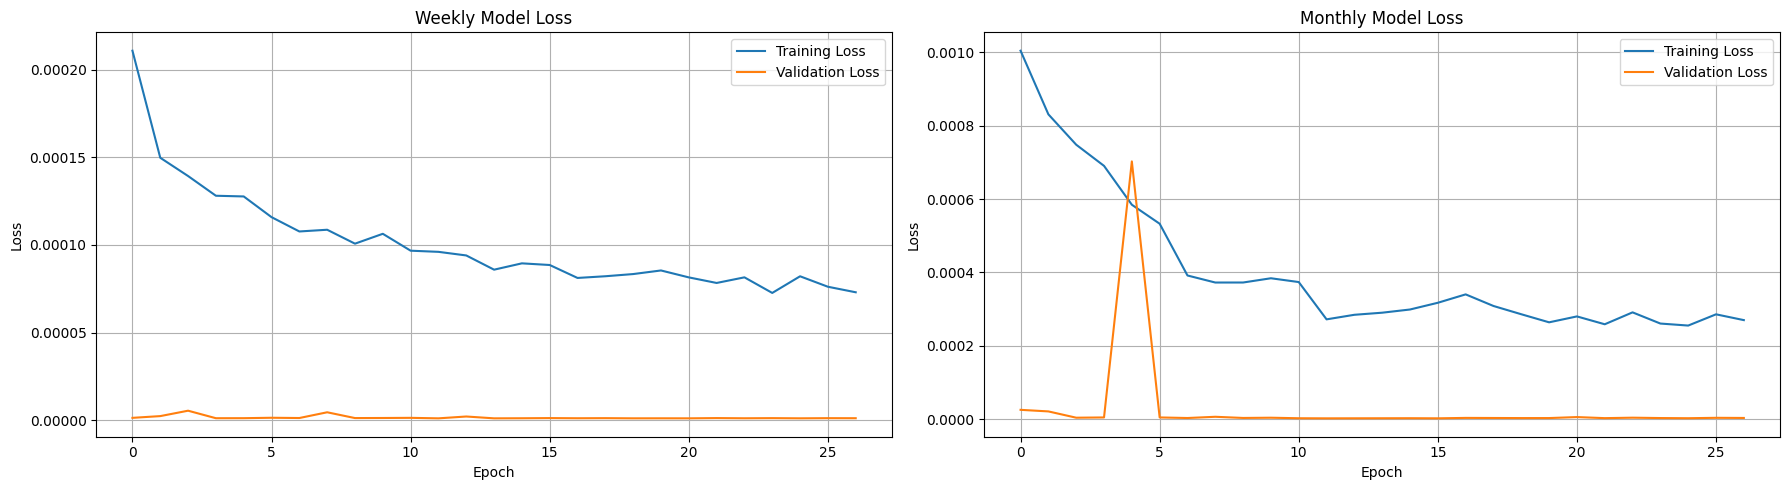

In [15]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot weekly model loss
axes[0].plot(weekly_history.history['loss'], label='Training Loss')
axes[0].plot(weekly_history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Weekly Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Plot monthly model loss
axes[1].plot(monthly_history.history['loss'], label='Training Loss')
axes[1].plot(monthly_history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Monthly Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Metrics helper ---
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse


# --- WEEKLY EVALUATION ---
if 'weekly_model' in globals() and X_weekly_test is not None:
    y_pred_weekly_scaled = weekly_model.predict(X_weekly_test, verbose=0)
    y_pred_weekly = scaler_weekly.inverse_transform(y_pred_weekly_scaled.reshape(-1, 1)).flatten()
    y_true_weekly = scaler_weekly.inverse_transform(
        np.array(y_weekly_test).reshape(-1, 1)
    ).flatten()

    mae_w, mse_w, rmse_w = compute_metrics(y_true_weekly, y_pred_weekly)
    print(f"Weekly  — MAE: {mae_w:.4f}, MSE: {mse_w:.4f}, RMSE: {rmse_w:.4f}")
else:
    print("Weekly evaluation skipped (weekly_model or data not found).")


# --- MONTHLY EVALUATION ---
y_pred_monthly_scaled = monthly_model.predict(X_monthly_test, verbose=0)
y_pred_monthly = scaler_monthly.inverse_transform(y_pred_monthly_scaled.reshape(-1, 1)).flatten()
y_true_monthly = scaler_monthly.inverse_transform(
    np.array(y_monthly_test).reshape(-1, 1)
).flatten()

mae_m, mse_m, rmse_m = compute_metrics(y_true_monthly, y_pred_monthly)
print(f"Monthly — MAE: {mae_m:.4f}, MSE: {mse_m:.4f}, RMSE: {rmse_m:.4f}")


# --- ANNUAL EVALUATION (Aggregate Monthly Predictions) ---
if 'end_dates_monthly_test' not in globals() or end_dates_monthly_test is None:
    raise NameError("Need `end_dates_monthly_test` from your sequence creation step.")

idx = pd.to_datetime(end_dates_monthly_test)
monthly_pred_series = pd.Series(y_pred_monthly, index=idx)
monthly_true_series = pd.Series(y_true_monthly, index=idx)

# Aggregate by year
annual_pred = monthly_pred_series.groupby(monthly_pred_series.index.year).sum()
annual_true = monthly_true_series.groupby(monthly_true_series.index.year).sum()

# Align years
years = sorted(set(annual_true.index).union(set(annual_pred.index)))
annual_true = annual_true.reindex(years, fill_value=0)
annual_pred = annual_pred.reindex(years, fill_value=0)

mae_a, mse_a, rmse_a = compute_metrics(annual_true.values, annual_pred.values)
print(f"Annual  — MAE: {mae_a:.4f}, MSE: {mse_a:.4f}, RMSE: {rmse_a:.4f}")

# Comparison DataFrame
annual_comparison_df = pd.DataFrame({
    'Actual Outbreaks (Annual)': annual_true,
    'Predicted Outbreaks (Annual)': annual_pred
})
display(annual_comparison_df)


Weekly  — MAE: 0.0631, MSE: 0.1774, RMSE: 0.4212
Monthly — MAE: 0.3155, MSE: 2.6839, RMSE: 1.6383
Annual  — MAE: 107.3133, MSE: 11516.5459, RMSE: 107.3152


,Actual Outbreaks (Annual),Predicted Outbreaks (Annual)
2024,97.0,-9.680367
2025,246.0,138.053757


# Model Prediction

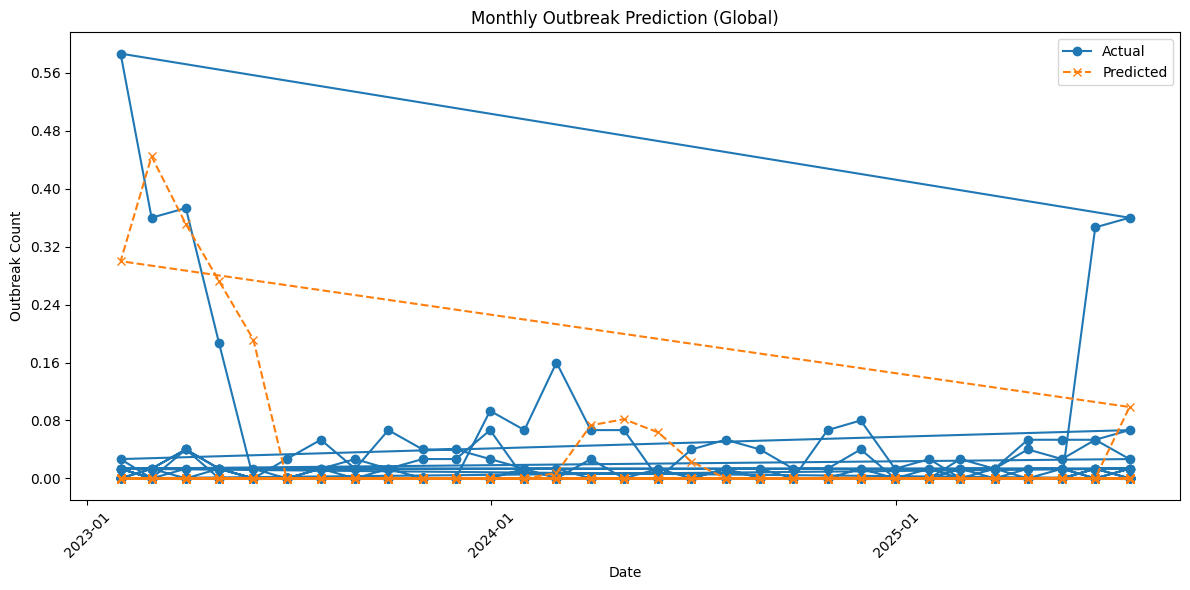

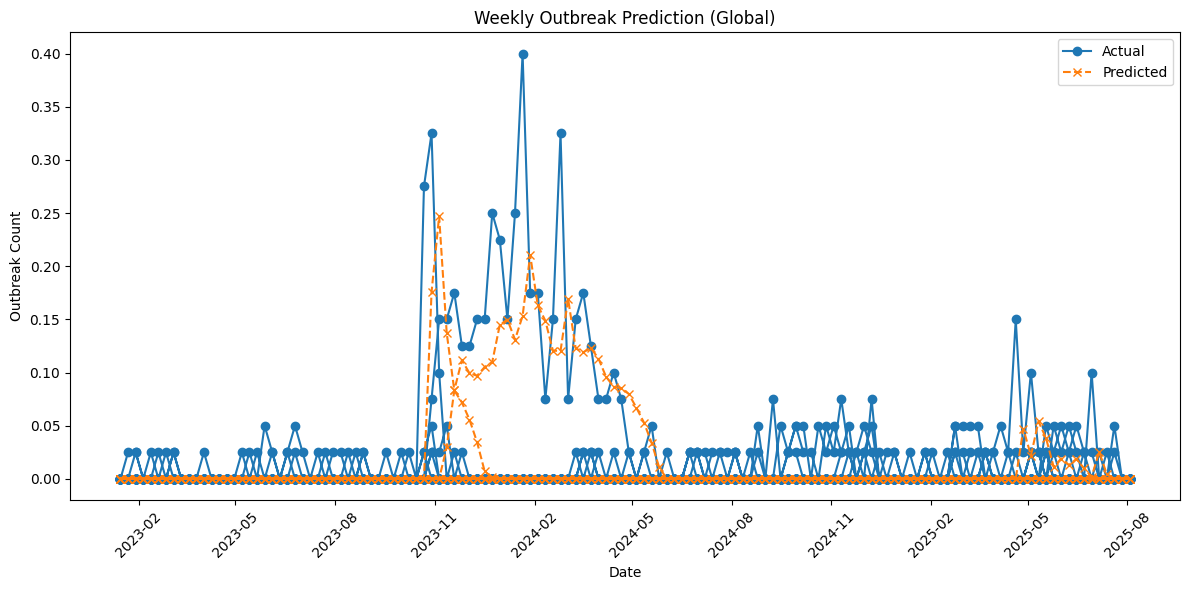

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

def plot_actual_vs_predicted_per_country(
    model, X_test, y_test, dates, countries, title, y_scaler=None, mode="weekly"
):
    """
    Plots actual vs predicted outbreak counts (global, not separated by country).

    Parameters:
    - model: Trained Keras model
    - X_test: Test features
    - y_test: Test target (scaled if a scaler is used)
    - dates: List/array of datetime values
    - countries: List/array of country names corresponding to y_test (unused here)
    - title: Plot title
    - y_scaler: MinMaxScaler fitted on y (optional)
    - mode: "weekly" or "monthly" for x-axis formatting
    """

    # Convert dates to pandas datetime
    dates = pd.to_datetime(dates)

    # Predict
    y_pred = model.predict(X_test, verbose=0).flatten()

    # Inverse transform predictions and actual values if scaler is provided
    if y_scaler is not None:
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Align lengths
    min_len = min(len(dates), len(y_test), len(y_pred), len(countries))
    dates = dates[:min_len]
    y_test = y_test[:min_len]
    y_pred = y_pred[:min_len]
    countries = countries[:min_len]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, y_test, marker="o", linestyle="-", label="Actual")
    plt.plot(dates, y_pred, marker="x", linestyle="--", label="Predicted")

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Outbreak Count")
    plt.legend()
    plt.xticks(rotation=45)

    # Force y-axis to show integer ticks only
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Date formatting
    if mode == "weekly":
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    elif mode == "monthly":
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

    plt.tight_layout()
    plt.show()

    return y_test, y_pred

# Monthly
monthly_actual, monthly_pred = plot_actual_vs_predicted_per_country(
    monthly_model,
    X_monthly_test,
    y_monthly_test,
    dates=monthly_panel_test['start_date'][-len(y_monthly_test):],
    countries=monthly_panel_test['country'][-len(y_monthly_test):],  # still required for alignment
    title="Monthly Outbreak Prediction (Global)",
    y_scaler=y_scaler_monthly,
    mode="monthly"
)

# Weekly
weekly_actual, weekly_pred = plot_actual_vs_predicted_per_country(
    weekly_model,
    X_weekly_test,
    y_weekly_test,
    dates=weekly_panel_test['start_date'][-len(y_weekly_test):],
    countries=weekly_panel_test['country'][-len(y_weekly_test):],  # still required for alignment
    title="Weekly Outbreak Prediction (Global)",
    y_scaler=y_scaler_weekly,
    mode="weekly"
)


# Annual prediciton

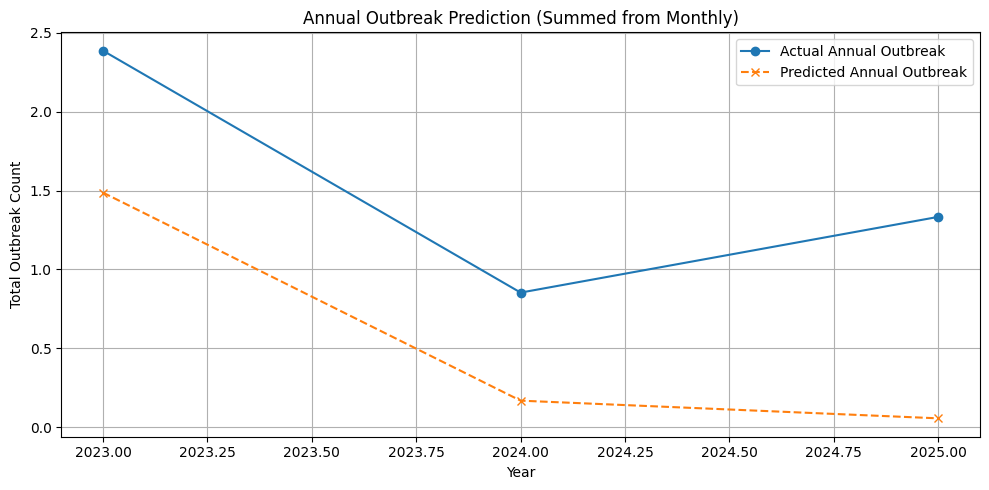

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_annual_outbreak_from_monthly(dates, y_actual, y_pred, title="Annual Outbreak Prediction"):
    """
    Aggregate monthly outbreak data into annual totals and plot actual vs predicted.

    Parameters:
    - dates: pandas Series/array of monthly datetime values
    - y_actual: array of actual outbreak counts (monthly)
    - y_pred: array of predicted outbreak counts (monthly)
    - title: plot title
    """

    # Ensure dates are datetime
    dates = pd.to_datetime(dates)

    # Create DataFrame
    df = pd.DataFrame({
        "date": dates,
        "actual": y_actual,
        "pred": y_pred
    })

    # Extract year
    df["year"] = df["date"].dt.year

    # Aggregate by year (sum of monthly outbreaks per year)
    annual_df = df.groupby("year")[["actual", "pred"]].sum().reset_index()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(annual_df["year"], annual_df["actual"], marker="o", linestyle="-", label="Actual Annual Outbreak")
    plt.plot(annual_df["year"], annual_df["pred"], marker="x", linestyle="--", label="Predicted Annual Outbreak")

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Total Outbreak Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return annual_df

# ---- Run for your monthly results ----
annual_outbreaks = plot_annual_outbreak_from_monthly(
    dates=monthly_panel_test['start_date'][-len(monthly_actual):],
    y_actual=monthly_actual,
    y_pred=monthly_pred,
    title="Annual Outbreak Prediction (Summed from Monthly)"
)


In [34]:
import pandas as pd

# Create a DataFrame for weekly results
weekly_comparison_df = pd.DataFrame({
    'Actual Outbreaks (Weekly)': weekly_actual,
    'Predicted Outbreaks (Weekly)': weekly_pred
})
print("\nWeekly Actual vs Predicted Outbreaks:")
display(weekly_comparison_df.head()) # Displaying head for brevity, can remove .head() to show all

# Create a DataFrame for monthly results
monthly_comparison_df = pd.DataFrame({
    'Actual Outbreaks (Monthly)': monthly_actual,
    'Predicted Outbreaks (Monthly)': monthly_pred
})
print("\nMonthly Actual vs Predicted Outbreaks:")
display(monthly_comparison_df.head()) # Displaying head for brevity, can remove .head() to show all


Weekly Actual vs Predicted Outbreaks:


,Actual Outbreaks (Weekly),Predicted Outbreaks (Weekly)
0,0.0,0.00007
1,0.0,0.00007
2,0.0,0.00007
3,0.0,0.00007
4,0.0,0.00007



Monthly Actual vs Predicted Outbreaks:


,Actual Outbreaks (Monthly),Predicted Outbreaks (Monthly)
0,0.0,0.000032
1,0.0,-0.000006
2,0.0,-0.000087
3,0.0,-0.000189
4,0.0,-0.000284


# Save Model

In [35]:
import os

# Create a directory to save the global models
global_models_save_dir = "global_lstm_models"
os.makedirs(global_models_save_dir, exist_ok=True)

# Save the weekly model
weekly_model_save_path = os.path.join(global_models_save_dir, "global_weekly_model.keras")
weekly_model.save(weekly_model_save_path)
print(f"Weekly model saved to: {weekly_model_save_path}")

# Save the monthly model
monthly_model_save_path = os.path.join(global_models_save_dir, "global_monthly_model.keras")
monthly_model.save(monthly_model_save_path)
print(f"Monthly model saved to: {monthly_model_save_path}")


Weekly model saved to: global_lstm_models/global_weekly_model.keras
Monthly model saved to: global_lstm_models/global_monthly_model.keras


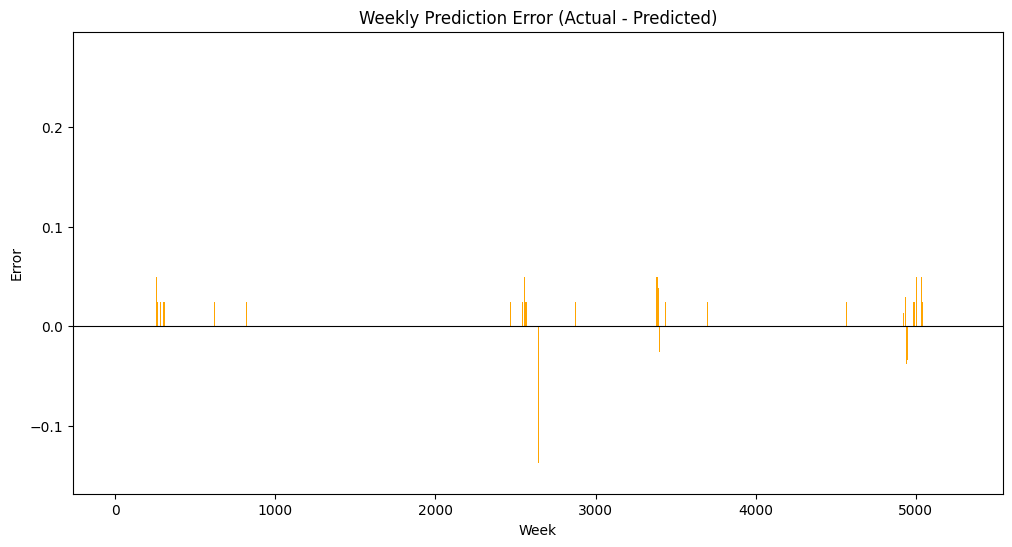

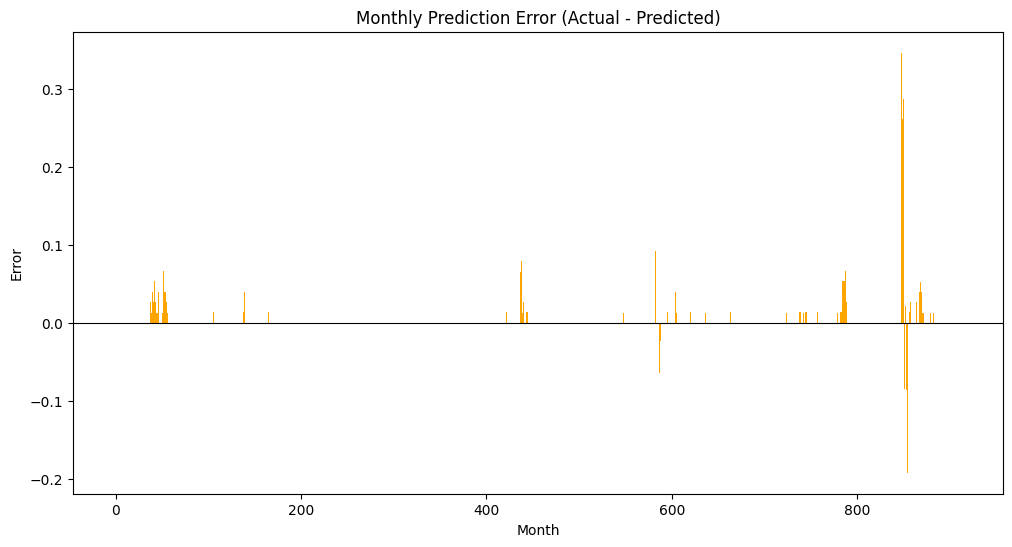

In [36]:
# View the error plot
weekly_error = weekly_actual - weekly_pred

plt.figure(figsize=(12,6))
plt.bar(range(len(weekly_error)), weekly_error, color='orange')
plt.title('Weekly Prediction Error (Actual - Predicted)')
plt.xlabel('Week')
plt.ylabel('Error')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

month_error = monthly_actual - monthly_pred

plt.figure(figsize=(12,6))
plt.bar(range(len(month_error)), month_error, color='orange')
plt.title('Monthly Prediction Error (Actual - Predicted)')
plt.xlabel('Month')
plt.ylabel('Error')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

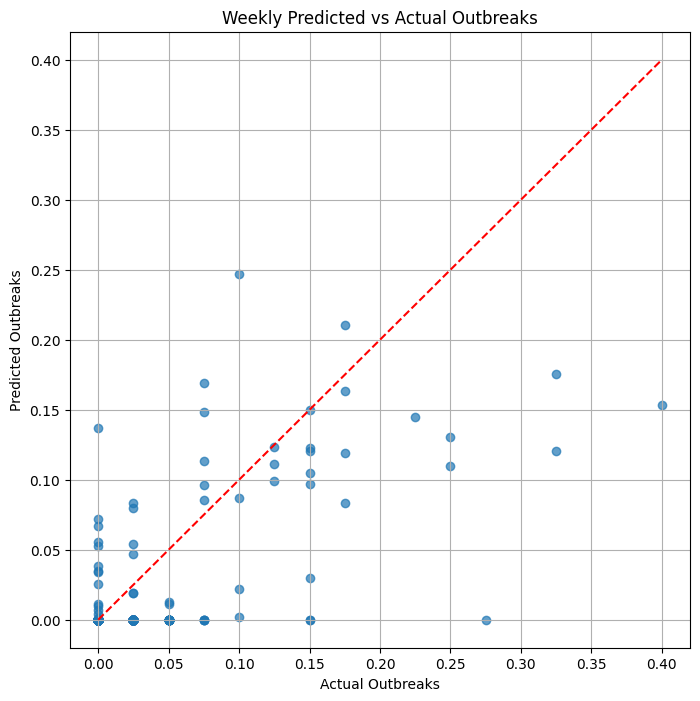

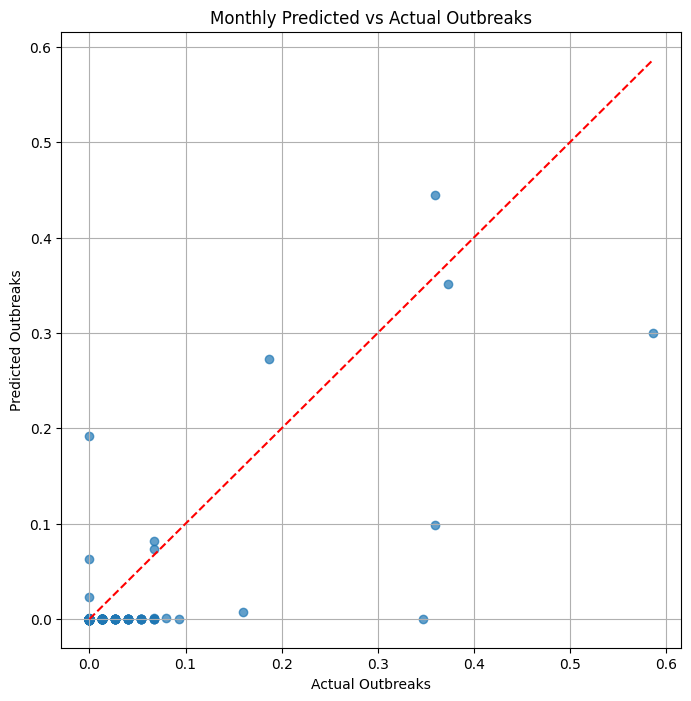

In [37]:
# View the correlation
plt.figure(figsize=(8,8))
plt.scatter(weekly_actual, weekly_pred, alpha=0.7)
plt.plot([weekly_actual.min(), weekly_actual.max()],
         [weekly_actual.min(), weekly_actual.max()],
         'r--')  # 45-degree line
plt.xlabel('Actual Outbreaks')
plt.ylabel('Predicted Outbreaks')
plt.title('Weekly Predicted vs Actual Outbreaks')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(monthly_actual, monthly_pred, alpha=0.7)
plt.plot([monthly_actual.min(), monthly_actual.max()],
         [monthly_actual.min(), monthly_actual.max()],
         'r--')  # 45-degree line
plt.xlabel('Actual Outbreaks')
plt.ylabel('Predicted Outbreaks')
plt.title('Monthly Predicted vs Actual Outbreaks')
plt.grid(True)
plt.show()

# Model Forecasting (Predict until July 2025)

In [ ]:
# here do the testing model performance by loading the monthly model and run in the testing set inside here